In [256]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import re

In [257]:
# Model Opening
model_path = 'SIE'
model_ver = 'SIE_POS+FLUX'

if 'POS+FLUX' in model_ver:
    constraint = 'pos_flux'
elif 'POS' in model_ver:
    constraint = 'pos'


# Load the data
with open(model_path + '/' + model_ver + '_optresult' + '.dat', 'r') as file:
    opt_result = file.readlines()

opt_result

with open(model_path + '/' + constraint + '_point' + '.py', 'r') as file:
    py = file.readlines()

py

['#!/usr/bin/env python\n',
 'import glafic\n',
 '\n',
 "glafic.init(0.3, 0.7, -1.0, 0.7, 'SIE/SIE_POS+FLUX', 20.0, 20.0, 21.56, 21.56, 0.001, 0.001, 1, verb = 0)\n",
 '\n',
 "glafic.set_secondary('chi2_splane 0', verb = 0)\n",
 "glafic.set_secondary('chi2_checknimg 0', verb = 0)\n",
 "glafic.set_secondary('chi2_restart   -1', verb = 0)\n",
 "glafic.set_secondary('chi2_usemag    1', verb = 0)\n",
 "glafic.set_secondary('hvary          0', verb = 0)\n",
 "glafic.set_secondary('ran_seed -122000', verb = 0)\n",
 '\n',
 'glafic.startup_setnum(1, 0, 1)\n',
 "glafic.set_lens(1, 'sie', 0.261343256161012, 1.57e+02,  20.80, 20.75, 0.12, -4.0, 0.0, 0.0)\n",
 'glafic.set_point(1, 1.0, 20.78, 20.78)\n',
 '\n',
 'glafic.setopt_lens(1, 0, 1, 1, 1, 1, 1, 0, 0)\n',
 'glafic.setopt_point(1, 0, 1, 1)\n',
 '\n',
 '# model_init needs to be done again whenever model parameters are changed\n',
 'glafic.model_init(verb = 0)\n',
 '\n',
 "glafic.readobs_point('/Users/ainsleylewis/Documents/Astronomy/IllustrisT

In [258]:
# Extract the line containing 'glafic.startup_setnum('
startup_setnum_line = next(line for line in py if 'glafic.startup_setnum(' in line)

set_point_line = next(line for line in py if 'glafic.set_point(' in line)

# Extract the first number inside the parentheses
extracted_value = int(re.search(r'glafic\.startup_setnum\((\d+)', startup_setnum_line).group(1))

print(extracted_value)

set_point = int(re.search(r'glafic\.set_point\((\d+)', set_point_line).group(1))

print(set_point)

1
1


In [259]:
# Model Values 
# Find the line containing 'lens   sie' in opt_result
model_input = model_path.lower()
if model_input == 'nfw':
    model_input = 'anfw'
if model_input == 'c_sie':
    model_input = 'sie'

lens_sie_line = next(line for line in reversed(opt_result) if 'lens   ' + model_input in line)

print(lens_sie_line)

# Extract the values from the line
lens_sie_values = lens_sie_line.split()[2:]
lens_sie_values = [str(value) for value in lens_sie_values]
lens_sie_values

# Find the line containing 'glafic.set_point' in opt_result
set_point_line = next(line for line in reversed(opt_result) if 'point' in line)

print(set_point_line)

# Extract the values from the line
set_point_values = set_point_line.split()[1:]
set_point_values = [str(value) for value in set_point_values]
set_point_values


lens   sie     0.2613  1.579763e+02  2.080977e+01  2.075960e+01  1.271712e-01 -4.438612e+00  0.000000e+00  0.000000e+00 

point  1.0000  2.081284e+01  2.078037e+01 



['1.0000', '2.081284e+01', '2.078037e+01']

In [260]:
name = "'" + model_path + '/' + model_ver + "'"
name

"'SIE/SIE_POS+FLUX'"

In [261]:
model_input_1 = "'" + model_input + "'"
r1 = 0.03
r2 = 0.8
n = 1000
len_num = 1

# Read the existing file contents
with open('kappa_glafic.py', 'r') as f:
    py = f.readlines()

# Update values and write back
with open('kappa_glafic.py', 'w') as glafic_file:
    for line in py:
        if 'glafic.set_lens(' in line:
            print('Found glafic.set_lens')
            line = f"glafic.set_lens(1, {model_input_1}, {lens_sie_values[0]}, {lens_sie_values[1]}, {lens_sie_values[2]}, {lens_sie_values[3]}, {lens_sie_values[4]}, {lens_sie_values[5]}, {lens_sie_values[6]}, {lens_sie_values[7]})\n"
        elif 'glafic.init(' in line:
            line = f"glafic.init(0.3, 0.7, -1.0, 0.7, {name}, 20.0, 20.0, 21.56, 21.56, 0.01, 0.01, 1, verb = 0)\n"
        elif 'glafic.set_point(' in line:
            print('Found glafic.set_point')
            # Ensure values are up to date
            if set_point_values is not None and len(set_point_values) == 3:
                line = f"glafic.set_point(1, 1.000, {set_point_values[0]}, {set_point_values[1]})\n"
            else:
                print("set_point_values is not set correctly.")
        elif 'glafic.kapparad(' in line:
            print('Found glafic.kapparad')
            line = f"glafic.kapparad({set_point_values[0]}, {set_point_values[1]}, {set_point_values[2]}, {r1}, {r2}, {n}, {len_num})\n"
        elif 'glafic.kappacum(' in line:
            print('Found glafic.kappacum')
            line = f"glafic.kappacum({set_point_values[0]}, {set_point_values[1]}, {set_point_values[2]}, {r1}, {r2}, {n}, {len_num})\n"
        glafic_file.write(line)

Found glafic.set_lens
Found glafic.set_point
Found glafic.kapparad
Found glafic.kappacum


In [262]:
%run kappa_glafic.py

######## computing radial profile of kappa
 zs = 1.000000e+00,  lens id = 1,  step = 1000
 center = (2.081284e+01, 2.078037e+01),  range = [3.000000e-02, 8.000000e-01]
 output file name = SIE/SIE_POS+FLUX_kaprad.dat

3.000000e-02 9.546861e+00
3.077000e-02 9.212837e+00
3.154000e-02 8.905527e+00
3.231000e-02 8.621985e+00
3.308000e-02 8.358857e+00
3.385000e-02 8.113727e+00
3.462000e-02 7.887086e+00
3.539000e-02 7.671726e+00
3.616000e-02 7.469325e+00
3.693000e-02 7.278611e+00
3.770000e-02 7.098491e+00
3.847000e-02 6.928014e+00
3.924000e-02 6.766352e+00
4.001000e-02 6.612775e+00
4.078000e-02 6.466638e+00
4.155000e-02 6.327369e+00
4.232000e-02 6.194456e+00
4.309000e-02 6.067442e+00
4.386000e-02 5.945913e+00
4.463000e-02 5.829498e+00
4.540000e-02 5.717859e+00
4.617000e-02 5.610689e+00
4.694000e-02 5.507710e+00
4.771000e-02 5.408665e+00
4.848000e-02 5.313321e+00
4.925000e-02 5.221464e+00
5.002000e-02 5.132895e+00
5.079000e-02 5.047432e+00
5.156000e-02 4.964906e+00
5.233000e-02 4.885162e+00
5.3

In [263]:
# Math for img positions 
x_cent = float(set_point_values[1])
y_cent = float(set_point_values[2])
print(x_cent, y_cent)

# Predicted Positions 
pred_columns = ['x', 'y', 'mag', 'err']
pred_file = model_path + '/' + model_ver + '_point.dat'
pred = pd.read_fwf(pred_file, sep=' ', header=None, skiprows=1, names=pred_columns)

pred_rad = np.sqrt((pred['x'] - x_cent)**2 + (pred['y'] - y_cent)**2)
pred['rad'] = pred_rad
pred

# Remove 5th image
pred = pred[pred['rad'] >= 0.1].reset_index(drop=True)


inset_x_lim_l = min(pred['rad']) - 0.005
inset_x_lim_u = max(pred['rad']) + 0.005

20.81284 20.78037


4200e-01 3.598330e-01
6.821900e-01 3.594267e-01
6.829600e-01 3.590213e-01
6.837300e-01 3.586168e-01
6.845000e-01 3.582132e-01
6.852700e-01 3.578105e-01
6.860400e-01 3.574087e-01
6.868100e-01 3.570078e-01
6.875800e-01 3.566078e-01
6.883500e-01 3.562088e-01
6.891200e-01 3.558106e-01
6.898900e-01 3.554133e-01
6.906600e-01 3.550168e-01
6.914300e-01 3.546213e-01
6.922000e-01 3.542266e-01
6.929700e-01 3.538329e-01
6.937400e-01 3.534400e-01
6.945100e-01 3.530479e-01
6.952800e-01 3.526568e-01
6.960500e-01 3.522665e-01
6.968200e-01 3.518770e-01
6.975900e-01 3.514885e-01
6.983600e-01 3.511008e-01
6.991300e-01 3.507139e-01
6.999000e-01 3.503279e-01
7.006700e-01 3.499427e-01
7.014400e-01 3.495584e-01
7.022100e-01 3.491750e-01
7.029800e-01 3.487923e-01
7.037500e-01 3.484105e-01
7.045200e-01 3.480296e-01
7.052900e-01 3.476494e-01
7.060600e-01 3.472702e-01
7.068300e-01 3.468917e-01
7.076000e-01 3.465140e-01
7.083700e-01 3.461372e-01
7.091400e-01 3.457612e-01
7.099100e-01 3.453860e-01
7.106800e-01 3.4

In [264]:
# Plot profile 
# Load the data
columns = ['r', 'kappa']
data = pd.read_csv( model_path + '/' + model_ver + '_kaprad.dat', sep=' ', header=None, names=columns)
data2 = pd.read_csv(model_path + '/' + model_ver + '_kapcum.dat', sep=' ', header=None, names=columns)

In [265]:
# Percet Height

kap_pred = [data2.loc[(data2['r'] - rad).abs().idxmin(), 'kappa'] for rad in pred['rad']]
kap_max = max(data2['kappa'])

percent_height = [kap/kap_max for kap in kap_pred]
percent_height = [ph + 0.01 for ph in percent_height]

inset_percent_height = [ph + 0.5 for ph in percent_height]


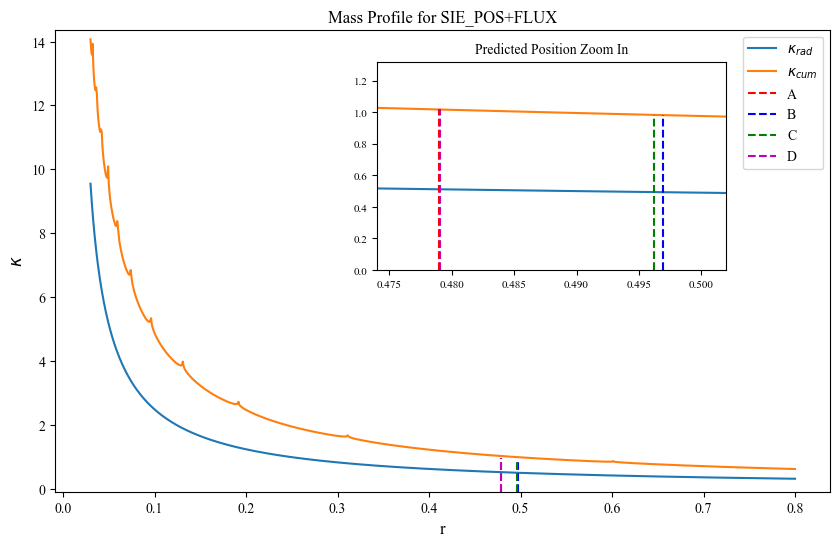

In [266]:
plt.figure(figsize=(10, 6))
plt.plot(data['r'], data['kappa'], label='$\kappa _{rad}$')
plt.plot(data2['r'], data2['kappa'], label='$\kappa _{cum}$')
plt.axvline(x=pred['rad'][0], color='r', linestyle='--', label='A', ymax=(kap_pred[0] / kap_max), ymin=0)
plt.axvline(x=pred['rad'][1], color='b', linestyle='--', label='B', ymax=(kap_pred[1] / kap_max), ymin=0)
plt.axvline(x=pred['rad'][2], color='g', linestyle='--', label='C', ymax=(kap_pred[2] / kap_max), ymin=0)
plt.axvline(x=pred['rad'][3], color='m', linestyle='--', label='D', ymax=(kap_pred[3] / kap_max), ymin=0)
plt.xlabel('r', fontsize=12)
plt.ylabel('$\kappa$', fontsize=12)
plt.title('Mass Profile for ' + model_ver)
plt.ylim(-0.1, max(data2['kappa']) + 0.3)
plt.legend()

# Add inset plot
ax_inset = inset_axes(plt.gca(), width="45%", height="45%", loc="upper center", bbox_to_anchor=(0.14, 0.02, 1, 1), bbox_transform=plt.gca().transAxes, borderpad=3)
ax_inset.plot(data['r'], data['kappa'], label='$\kappa _{rad}$')
ax_inset.plot(data2['r'], data2['kappa'], label='$\kappa _{cum}$')
ax_inset.set_xlim(inset_x_lim_l, inset_x_lim_u)  # Adjust the x-axis range for the inset
ax_inset.set_ylim(0, max(kap_pred) + 0.3)  # Adjust the y-axis range for the inset
ax_inset.axvline(x=pred['rad'][0], color='r', linestyle='--', label='A', ymax=(kap_pred[0] / (max(kap_pred) + 0.3)), ymin=0)
ax_inset.axvline(x=pred['rad'][1], color='b', linestyle='--', label='B', ymax=(kap_pred[1] / (max(kap_pred) + 0.3)), ymin=0)
ax_inset.axvline(x=pred['rad'][2], color='g', linestyle='--', label='C', ymax=(kap_pred[2] / (max(kap_pred) + 0.3)), ymin=0)
ax_inset.axvline(x=pred['rad'][3], color='m', linestyle='--', label='D', ymax=(kap_pred[3] / (max(kap_pred) + 0.3)), ymin=0)
ax_inset.set_title('Predicted Position Zoom In', fontsize=10)
ax_inset.tick_params(axis='both', which='major', labelsize=8)

plt.savefig('Mass Profiles/' + model_ver + '_mass_profile.png')
plt.show()

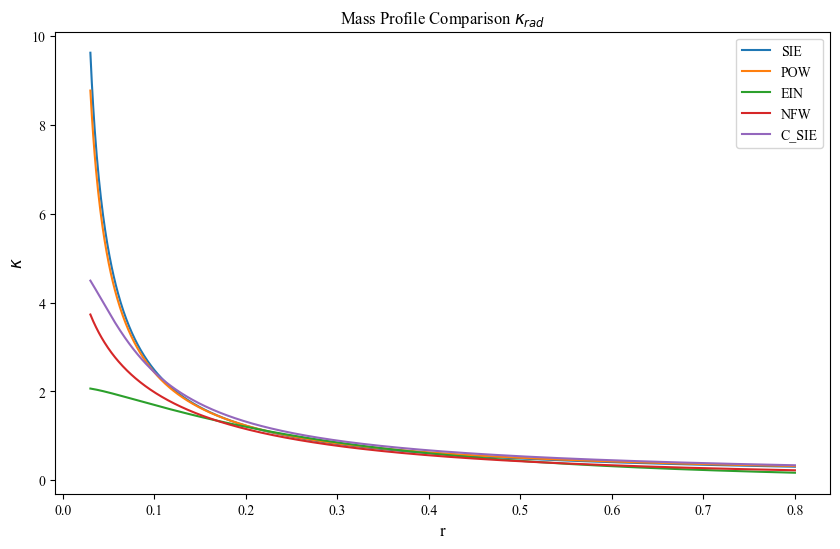

In [252]:
# Plots Kappa Rad
sie = pd.read_csv('SIE/SIE_POS_kaprad.dat', sep=' ', header=None, names=columns)
pow = pd.read_csv('POW/POW_POS_kaprad.dat', sep=' ', header=None, names=columns)
ein = pd.read_csv('EIN/EIN_POS_kaprad.dat', sep=' ', header=None, names=columns)
nfw = pd.read_csv('NFW/NFW_POS_kaprad.dat', sep=' ', header=None, names=columns)
c_sie = pd.read_csv('C_SIE/C_SIE_POS_kaprad.dat', sep=' ', header=None, names=columns)

plt.figure(figsize=(10, 6))
plt.plot(sie['r'], sie['kappa'], label='SIE')
plt.plot(pow['r'], pow['kappa'], label='POW')
plt.plot(ein['r'], ein['kappa'], label='EIN')
plt.plot(nfw['r'], nfw['kappa'], label='NFW')
plt.plot(c_sie['r'], c_sie['kappa'], label='C_SIE')
plt.xlabel('r', fontsize=12)
plt.ylabel('$\kappa$', fontsize=12)
plt.title('Mass Profile Comparison $\kappa_{rad}$')
plt.legend()



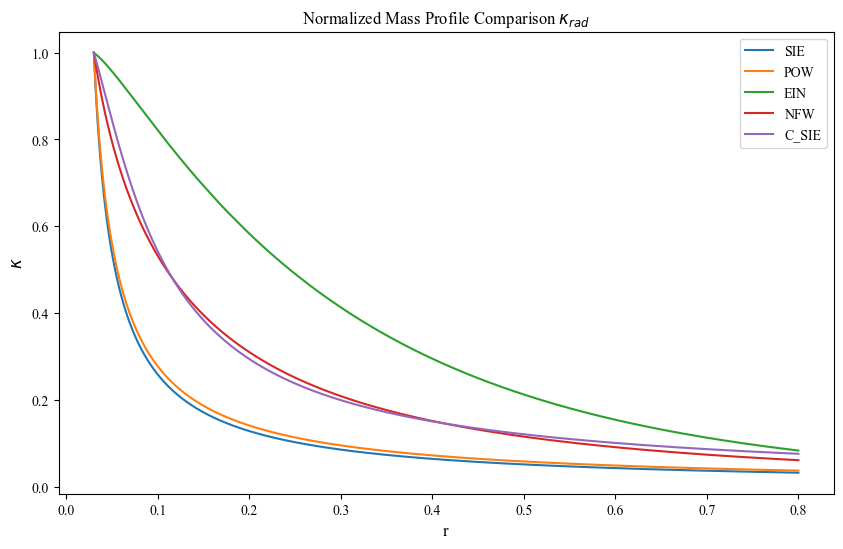

In [253]:
# Normalized Kappa Rad
sie_max = max(sie['kappa'])
pow_max = max(pow['kappa'])
ein_max = max(ein['kappa'])
nfw_max = max(nfw['kappa'])
c_sie_max = max(c_sie['kappa'])

sie['kappa'] = sie['kappa']/sie_max
pow['kappa'] = pow['kappa']/pow_max
ein['kappa'] = ein['kappa']/ein_max
nfw['kappa'] = nfw['kappa']/nfw_max
c_sie['kappa'] = c_sie['kappa']/c_sie_max

plt.figure(figsize=(10, 6))
plt.plot(sie['r'], sie['kappa'], label='SIE')
plt.plot(pow['r'], pow['kappa'], label='POW')
plt.plot(ein['r'], ein['kappa'], label='EIN')
plt.plot(nfw['r'], nfw['kappa'], label='NFW')
plt.plot(c_sie['r'], c_sie['kappa'], label='C_SIE')
plt.xlabel('r', fontsize=12)
plt.ylabel('$\kappa$', fontsize=12)
plt.title('Normalized Mass Profile Comparison $\kappa_{rad}$')
plt.legend()


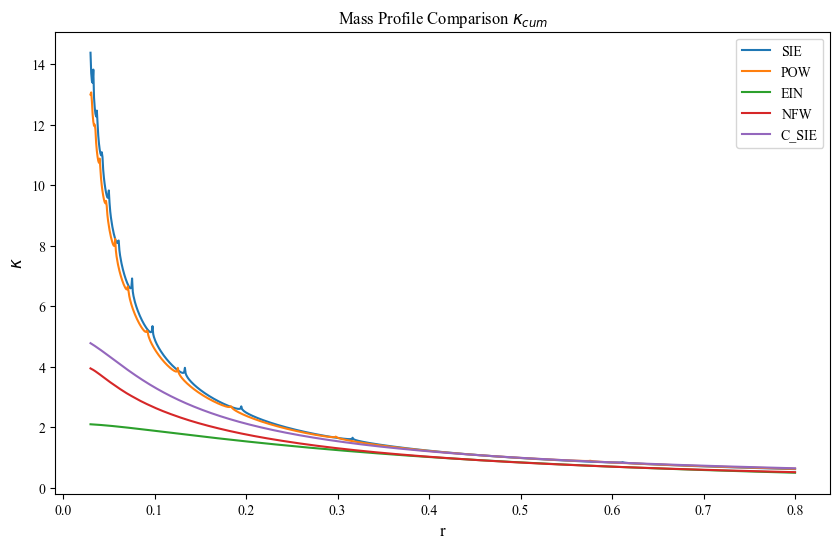

In [254]:
# Plots Kappa Rad
sie = pd.read_csv('SIE/SIE_POS_kapcum.dat', sep=' ', header=None, names=columns)
pow = pd.read_csv('POW/POW_POS_kapcum.dat', sep=' ', header=None, names=columns)
ein = pd.read_csv('EIN/EIN_POS_kapcum.dat', sep=' ', header=None, names=columns)
nfw = pd.read_csv('NFW/NFW_POS_kapcum.dat', sep=' ', header=None, names=columns)
c_sie = pd.read_csv('C_SIE/C_SIE_POS_kapcum.dat', sep=' ', header=None, names=columns)

plt.figure(figsize=(10, 6))
plt.plot(sie['r'], sie['kappa'], label='SIE')
plt.plot(pow['r'], pow['kappa'], label='POW')
plt.plot(ein['r'], ein['kappa'], label='EIN')
plt.plot(nfw['r'], nfw['kappa'], label='NFW')
plt.plot(c_sie['r'], c_sie['kappa'], label='C_SIE')
plt.xlabel('r', fontsize=12)
plt.ylabel('$\kappa$', fontsize=12)
plt.title('Mass Profile Comparison $\kappa_{cum}$')
plt.legend()



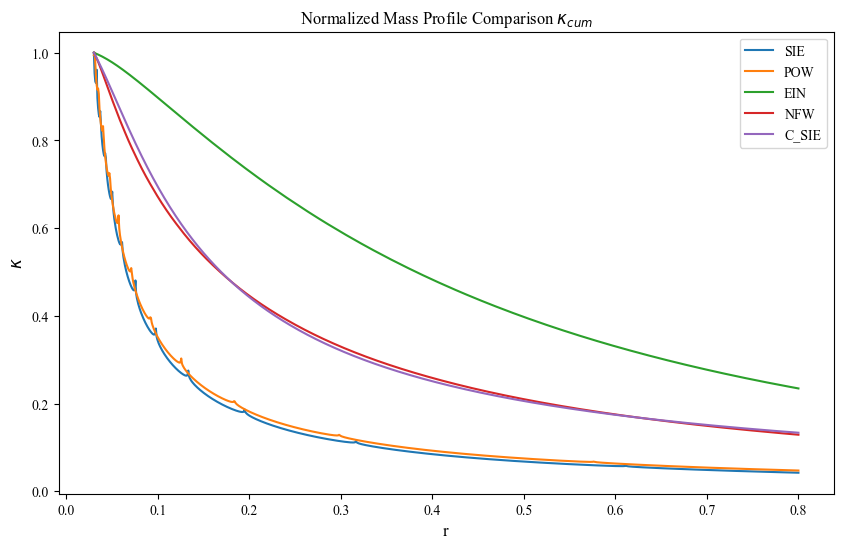

In [255]:
# Normalized Kappa Rad
sie_max = max(sie['kappa'])
pow_max = max(pow['kappa'])
ein_max = max(ein['kappa'])
nfw_max = max(nfw['kappa'])
c_sie_max = max(c_sie['kappa'])

sie['kappa'] = sie['kappa']/sie_max
pow['kappa'] = pow['kappa']/pow_max
ein['kappa'] = ein['kappa']/ein_max
nfw['kappa'] = nfw['kappa']/nfw_max
c_sie['kappa'] = c_sie['kappa']/c_sie_max

plt.figure(figsize=(10, 6))
plt.plot(sie['r'], sie['kappa'], label='SIE')
plt.plot(pow['r'], pow['kappa'], label='POW')
plt.plot(ein['r'], ein['kappa'], label='EIN')
plt.plot(nfw['r'], nfw['kappa'], label='NFW')
plt.plot(c_sie['r'], c_sie['kappa'], label='C_SIE')
plt.xlabel('r', fontsize=12)
plt.ylabel('$\kappa$', fontsize=12)
plt.title('Normalized Mass Profile Comparison $\kappa_{cum}$')
plt.legend()
